In [1]:
import pandas as pd
import numpy as np

# **Import Data**

### Input your file path below:

In [16]:
# File path
donor_file = "Donor_data.csv"
gift_file = "Gift_data.csv"

In [17]:
# Read in data
donor_data = pd.read_csv(donor_file)
gift_data = pd.read_csv(gift_file)

In [19]:
# Snapshot
gift_data.head(10)

,Key Indicator,Constituent ID,Gift Date,Gift Amount,Appeal Split Amount,Gift Type,Category,Campaign ID,Campaign Description,Fund ID,Fund Description,Appeal ID,Appeal Description,Luminate Online Gift ID,NetCommunity Online Gift ID,Gift Code,OPX Provider Description
0,Individual,1026027.0,7/1/1998,$5.00,$5.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98KR,98 April Renewal,NaN,NaN,NaN,NaN
1,Individual,1041282.0,7/1/1998,$5.00,$5.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98LR,98 May Renewal,NaN,NaN,NaN,NaN
2,Individual,1041328.0,7/1/1998,$5.00,$5.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98JR,98 March Renewal,NaN,NaN,NaN,NaN
3,Individual,1111161.0,7/1/1998,$5.00,$5.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98LR,98 May Renewal,NaN,NaN,NaN,NaN
4,Individual,1113516.0,7/1/1998,$5.00,$5.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98LR,98 May Renewal,NaN,NaN,NaN,NaN
5,Individual,1033818.0,7/1/1998,$10.00,$10.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98ZZ,98ZZ,NaN,NaN,NaN,NaN
6,Individual,1027399.0,7/1/1998,$10.00,$10.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98LR,98 May Renewal,NaN,NaN,NaN,NaN
7,Individual,1043888.0,7/1/1998,$10.00,$10.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98LR,98 May Renewal,NaN,NaN,NaN,NaN
8,Individual,1094326.0,7/1/1998,$10.00,$10.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98LR,98 May Renewal,NaN,NaN,NaN,NaN
9,Individual,1106432.0,7/1/1998,$10.00,$10.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98LR,98 May Renewal,NaN,NaN,NaN,NaN


In [20]:
# Columns
gift_data.dtypes

Key Indicator                   object
Constituent ID                 float64
Gift Date                       object
Gift Amount                     object
Appeal Split Amount             object
Gift Type                       object
Category                        object
Campaign ID                     object
Campaign Description            object
Fund ID                         object
Fund Description                object
Appeal ID                       object
Appeal Description              object
Luminate Online Gift ID         object
NetCommunity Online Gift ID    float64
Gift Code                       object
OPX Provider Description        object
dtype: object

# Exploratory Data Analysis (EDA)

In [22]:
# Remove dollar signs from the 'Gift Amount' column
gift_data['Gift Amount'] = gift_data['Gift Amount'].str.replace('$', '')

# Remove commas from the 'Gift Amount' column
gift_data['Gift Amount'] = gift_data['Gift Amount'].str.replace(',', '')

In [23]:
# Convert the 'Gift Amount' column to numeric (float or int)
gift_data['Gift Amount'] = pd.to_numeric(gift_data['Gift Amount'])

In [24]:
# Categorize donors based on the 'Gift Amount' using specified bins
gift_data['donor_category'] = pd.cut(
    gift_data['Gift Amount'],                 # The column to bin
    bins=[-float('inf'), 1000, 9999, float('inf')],  # The bin edges
    labels=['low donor', 'mid donor', 'high donor']  # The labels for the bins
)


In [25]:
# Snapshot
gift_data.head(10)

,Key Indicator,Constituent ID,Gift Date,Gift Amount,Appeal Split Amount,Gift Type,Category,Campaign ID,Campaign Description,Fund ID,Fund Description,Appeal ID,Appeal Description,Luminate Online Gift ID,NetCommunity Online Gift ID,Gift Code,OPX Provider Description,donor_category
0,Individual,1026027.0,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98KR,98 April Renewal,NaN,NaN,NaN,NaN,low donor
1,Individual,1041282.0,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98LR,98 May Renewal,NaN,NaN,NaN,NaN,low donor
2,Individual,1041328.0,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98JR,98 March Renewal,NaN,NaN,NaN,NaN,low donor
3,Individual,1111161.0,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98LR,98 May Renewal,NaN,NaN,NaN,NaN,low donor
4,Individual,1113516.0,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98LR,98 May Renewal,NaN,NaN,NaN,NaN,low donor
5,Individual,1033818.0,7/1/1998,10.0,$10.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98ZZ,98ZZ,NaN,NaN,NaN,NaN,low donor
6,Individual,1027399.0,7/1/1998,10.0,$10.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98LR,98 May Renewal,NaN,NaN,NaN,NaN,low donor
7,Individual,1043888.0,7/1/1998,10.0,$10.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98LR,98 May Renewal,NaN,NaN,NaN,NaN,low donor
8,Individual,1094326.0,7/1/1998,10.0,$10.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98LR,98 May Renewal,NaN,NaN,NaN,NaN,low donor
9,Individual,1106432.0,7/1/1998,10.0,$10.00,Cash,Individual Giving,NaN,NaN,DM,Direct Mail - Old,98LR,98 May Renewal,NaN,NaN,NaN,NaN,low donor


In [26]:
# Assuming gift_data is a DataFrame and donor_category is a column in it
donor_counts = gift_data['donor_category'].value_counts()

high_donor_count = donor_counts.get('high donor', 0)
mid_donor_count = donor_counts.get('mid donor', 0)
low_donor_count = donor_counts.get('low donor', 0)

print(f"There are {high_donor_count} number of high donors.")
print(f"There are {mid_donor_count} number of mid donors.")
print(f"There are {low_donor_count} number of low donors.")


There are 1546 number of high donors.
There are 6772 number of mid donors.
There are 511475 number of low donors.


In [27]:
# Calculate the median gift amounts for each donor category
high_donor_median = gift_data[gift_data['donor_category'] == "high donor"]["Gift Amount"].median()
mid_donor_median = gift_data[gift_data['donor_category'] == "mid donor"]["Gift Amount"].median()
low_donor_median = gift_data[gift_data['donor_category'] == "low donor"]["Gift Amount"].median()

# Print the results with descriptive text
print(f"The median gift amount for high donors is {high_donor_median}.")
print(f"The median gift amount for mid donors is {mid_donor_median}.")
print(f"The median gift amount for low donors is {low_donor_median}.")


The median gift amount for high donors is 17816.72.
The median gift amount for mid donors is 2912.16.
The median gift amount for low donors is 20.0.


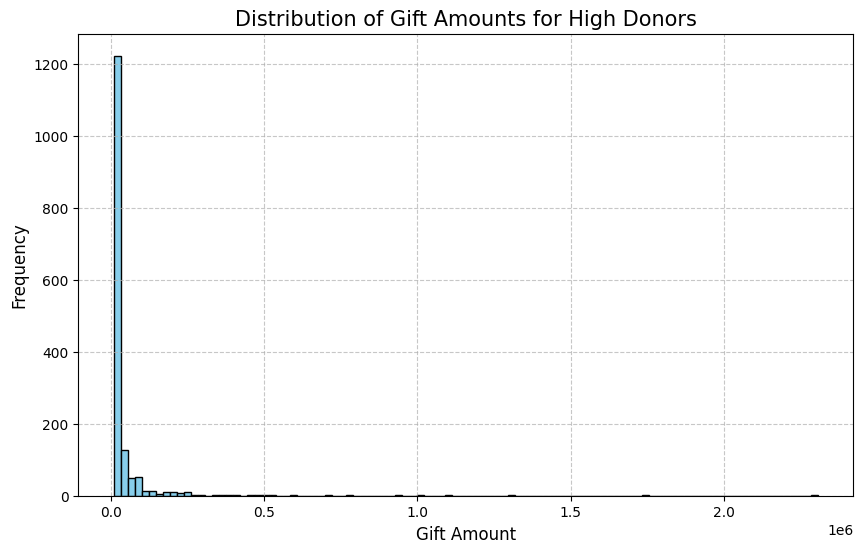

In [28]:
import matplotlib.pyplot as plt

# Filter the data for high donors
high_donors = gift_data[gift_data['donor_category'] == "high donor"]["Gift Amount"]

# Plot the histogram
plt.figure(figsize=(10, 6))  # Set the figure size
high_donors.plot(kind="hist", bins=100, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Gift Amounts for High Donors', fontsize=15)
plt.xlabel('Gift Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [29]:
# Convert the 'Constituent ID' column to numeric values
gift_data["Constituent ID"] = pd.to_numeric(gift_data["Constituent ID"])

# Create a new column 'ID' that is a copy of the 'Constituent ID' column
gift_data["ID"] = gift_data["Constituent ID"]

# Get the number of columns in the DataFrame
number_of_columns = gift_data.shape[1]

# Print the number of columns
print(number_of_columns)


19


In [30]:
# Count the occurrences of each value in the 'Fund ID' column
fund_id_counts = gift_data["Fund ID"].value_counts()

# Print the counts of each unique value
print(fund_id_counts)


Fund ID
DM                      301490
DM-New                  116406
700 FUND                 16871
Payroll LCF Employee     14476
700 LCIG                  5287
                         ...  
Rest Raleigh                 1
PAR-CILA                     1
HGF95                        1
restricted1                  1
350 SEPV                     1
Name: count, Length: 446, dtype: int64


In [54]:
donor_data["ZIP"].value_counts()
# zip code look up table

60067         227
60047         166
60010         166
60606         137
60173         127
             ... 
60091-2719      1
85266           1
10003           1
98004           1
60067-2398      1
Name: ZIP, Length: 40119, dtype: int64

# Join Tables and New Insights

In [32]:
# Merge gift_data and donor_data DataFrames on the 'ID' column
joined_data = pd.merge(gift_data, donor_data, on="ID")

In [35]:
# Snapshot
joined_data.head()

,Key Indicator,Constituent ID,Gift Date,Gift Amount,Appeal Split Amount,Gift Type,Category,Campaign ID,Campaign Description,Fund ID,...,ZIP,First Gift Date,First Gift Amount,First Gift Appeal_ID,First Gift Appeal Description,Solicit Code1,Solicit Code2,Solicit Code3,Solicit Code4,Solicit Code5
0,Individual,1026027.0,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,60453-5343,12/3/93,$5.00,94EA,94 October Acquisition,Annual Statement Only,NaN,NaN,NaN,NaN
1,Individual,1041282.0,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,60173-3841,12/10/96,$5.00,97EA,97 October Acquisition,NaN,NaN,NaN,NaN,NaN
2,Individual,1041328.0,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,60081-9212,12/10/96,$5.00,97EA,97 October Acquisition,NaN,NaN,NaN,NaN,NaN
3,Individual,1111161.0,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,60193-2521,11/25/91,$5.00,91UA,91 Acquisition,NaN,NaN,NaN,NaN,NaN
4,Individual,1113516.0,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,60137-6595,8/17/92,$10.00,92CA,92 August Acquisition,1X,NaN,NaN,NaN,NaN


In [36]:
# Convert 'Constituent ID' column to string and remove trailing '.0' characters
joined_data['Constituent ID'] = joined_data['Constituent ID'].astype(str).str.rstrip('.0')

In [37]:
# See changes
joined_data.head()

,Key Indicator,Constituent ID,Gift Date,Gift Amount,Appeal Split Amount,Gift Type,Category,Campaign ID,Campaign Description,Fund ID,...,ZIP,First Gift Date,First Gift Amount,First Gift Appeal_ID,First Gift Appeal Description,Solicit Code1,Solicit Code2,Solicit Code3,Solicit Code4,Solicit Code5
0,Individual,1026027,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,60453-5343,12/3/93,$5.00,94EA,94 October Acquisition,Annual Statement Only,NaN,NaN,NaN,NaN
1,Individual,1041282,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,60173-3841,12/10/96,$5.00,97EA,97 October Acquisition,NaN,NaN,NaN,NaN,NaN
2,Individual,1041328,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,60081-9212,12/10/96,$5.00,97EA,97 October Acquisition,NaN,NaN,NaN,NaN,NaN
3,Individual,1111161,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,60193-2521,11/25/91,$5.00,91UA,91 Acquisition,NaN,NaN,NaN,NaN,NaN
4,Individual,1113516,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,60137-6595,8/17/92,$10.00,92CA,92 August Acquisition,1X,NaN,NaN,NaN,NaN


In [38]:
# Convert 'Key Indicator' column to string
joined_data['Key Indicator'] = joined_data['Key Indicator'].astype(str)

For every Constituent ID, lifetime donations:

In [39]:
# Top donors
# Group by 'Constituent ID' and sum the 'Gift Amount' for each group
total_gifts_per_id = joined_data.groupby("Constituent ID")["Gift Amount"].sum()

# Sort the groups by the total gift amount in descending order and take the top 10
top_10_gifts = total_gifts_per_id.sort_values(ascending=False).head(10)

# Print the top 10 gifts
print(top_10_gifts)


Constituent ID
1244093    3843238.36
28568      2472491.66
1111396    2169556.41
111064     1714487.83
1005708    1625644.86
1028044    1388132.99
1117721    1373167.10
1099257    1356306.04
1098133    1295180.62
1122908    1187684.00
Name: Gift Amount, dtype: float64


How often do they donate?

In [49]:
# Group by 'Constituent ID' and count the number of unique appearances of 'Gift Date' for each group
unique_appearances = joined_data.groupby('Constituent ID')['Gift Date'].nunique().reset_index(name='Total Gift Times')

In [50]:
# Sort the unique_appearances DataFrame by 'Total Gift Times' in descending order
gift_counts = unique_appearances.sort_values('Total Gift Times', ascending=False)

# Limit to the top 10 entries
gift_counts_top_10 = gift_counts.head(10)

# Reset index and drop the old index
gift_counts_top_10 = gift_counts_top_10.reset_index(drop=True)


In [51]:
gift_counts_top_10

,Constituent ID,Total Gift Times
0,1098133,1399
1,1122318,501
2,1005581,461
3,1014186,421
4,1024411,403
5,1024403,401
6,1024415,379
7,1014082,376
8,1042564,375
9,1110484,361


Donation Frequnency:

In [52]:
gift_counts[gift_counts["Total Gift Times"] == 1]

,Constituent ID,Total Gift Times
39166,1261514,1
39153,1261485,1
777,1012984,1
44390,1273378,1
44076,1272939,1
...,...,...
34070,1244863,1
34071,1244891,1
34072,1244892,1
34075,1244895,1


In [54]:
# Calculate the ratio of constituents with only one gift occurrence to the total number of constituents
len(gift_counts[gift_counts["Total Gift Times"] == 1]) / len(gift_counts)

0.2768241295187403

Findings: 27% of donors gift only once

In [57]:
gift_counts[gift_counts["Total Gift Times"] > 50]

,Constituent ID,Total Gift Times
17228,1098133,1399
25337,1122318,501
176,1005581,461
840,1014186,421
1755,1024411,403
...,...,...
17088,1097778,51
5595,103856,51
22874,1113715,51
18164,1100514,51


In [58]:
len(gift_counts[gift_counts["Total Gift Times"] > 50])/len(gift_counts)

0.029940119760479042

Findings: only 3 percent of donors gift over 50 times

For every zipcode, median income - lookup table of zip code vs median income, city vs suburbs

In [64]:
# Group by ZIP code and calculate the sum of 'Gift Amount' for each ZIP code
zip_gift_amount_sum = joined_data.groupby('ZIP')['Gift Amount'].sum()

# Sort the ZIP codes by the sum of 'Gift Amount' in descending order
zip_gift_amount_sum_sorted = zip_gift_amount_sum.sort_values(ascending=False)

# Select the top 10 ZIP codes
top_10_zip_gift_amount_sum = zip_gift_amount_sum_sorted.head(10)

# Output the top 10 ZIP codes with their corresponding sum of 'Gift Amount'
print(top_10_zip_gift_amount_sum)


ZIP
49769-9135    3843238.36
60712-3207    2620200.24
60602-1334    1625644.86
07039-3119    1187684.00
34103         1153000.00
60187-3978    1065144.90
60631-2305    1054623.81
60093-4006     939145.95
60661-2134     906176.00
60706-4784     841037.79
Name: Gift Amount, dtype: float64


In [65]:
def clean_zip(zip_code):
    """
    Clean and format ZIP codes.

    Parameters:
    zip_code (str or float): ZIP code to be cleaned.

    Returns:
    str: Cleaned and formatted ZIP code.
    """
    if pd.isnull(zip_code):  # Check if the value is NaN (float)
        return None
    # Split by '-' and take the first part to handle extended ZIP codes
    cleaned_zip = str(zip_code).split('-')[0]
    # Take the first 5 characters to ensure a consistent 5-digit format
    return cleaned_zip[:5]

# Apply the clean_zip function to the 'ZIP' column to create a new column 'cleaned_zip_codes'
joined_data['cleaned_zip_codes'] = joined_data['ZIP'].apply(clean_zip)


In [66]:
joined_data["cleaned_zip_codes"]

0         60453
1         60173
2         60081
3         60193
4         60137
          ...  
519787    60515
519788    60637
519789    60123
519790    60532
519791    60056
Name: cleaned_zip_codes, Length: 519792, dtype: object

Group all Chicago zip codes into a "Chicago Group" for a Zip Code Group column

In [67]:
# Add a new column 'location' based on the cleaned ZIP codes
joined_data['location'] = np.where(joined_data['cleaned_zip_codes'].str.startswith('606'), 'Chicago', 'Not Chicago')

In [72]:
# Count the occurrences of each cleaned zip code in Chicago
chicago_zip_counts = joined_data[joined_data['location'] == "Chicago"]['cleaned_zip_codes'].value_counts()

# Select the top 10 most frequent appearing Chicago zip codes
top_10_chicago_zips = chicago_zip_counts.head(10)

# Output the top 10 Chicago zip codes
print(top_10_chicago_zips)


cleaned_zip_codes
60634    3218
60631    3191
60630    2350
60657    2317
60646    2171
60611    2154
60638    1943
60645    1852
60618    1711
60640    1677
Name: count, dtype: int64


Findings: 60634 is the most frequent donor in the Chicago area.

Add total sum of donation:

In [73]:
# Calculate the total gift amount for each constituent ID and align the results with the original DataFrame
joined_data['total_gift'] = joined_data.groupby('Constituent ID')['Gift Amount'].transform('sum')

In [74]:
joined_data

,Key Indicator,Constituent ID,Gift Date,Gift Amount,Appeal Split Amount,Gift Type,Category,Campaign ID,Campaign Description,Fund ID,...,First Gift Appeal Description,Solicit Code1,Solicit Code2,Solicit Code3,Solicit Code4,Solicit Code5,Total Gift Amount,cleaned_zip_codes,location,total_gift
0,Individual,1026027,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,94 October Acquisition,Annual Statement Only,NaN,NaN,NaN,NaN,NaN,60453,Not Chicago,410.00
1,Individual,1041282,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,97 October Acquisition,NaN,NaN,NaN,NaN,NaN,NaN,60173,Not Chicago,30.00
2,Individual,1041328,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,97 October Acquisition,NaN,NaN,NaN,NaN,NaN,NaN,60081,Not Chicago,106.00
3,Individual,1111161,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,91 Acquisition,NaN,NaN,NaN,NaN,NaN,NaN,60193,Not Chicago,80.00
4,Individual,1113516,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,92 August Acquisition,1X,NaN,NaN,NaN,NaN,NaN,60137,Not Chicago,151.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519787,Individual,1247705,6/30/2023,60.0,$60.00,Cash,Workplace Giving,4009 PYDEDLCF,Payroll Deductions LCF - 4009,Payroll LCF Employee,...,NaN,No Appeal Mail Solicitation (Nwsltr ok),NaN,NaN,NaN,NaN,NaN,60515,Not Chicago,6833.04
519788,Individual,1049457,6/30/2023,100.0,$100.00,Cash,Individual Giving,4001 INDGIV,Individual Giving - 4001,700 FUND,...,99EA,Annual Statement Only,NaN,NaN,NaN,NaN,NaN,60637,Chicago,2663.25
519789,Individual,124891,6/30/2023,45.0,$45.00,Cash,Workplace Giving,4009 PYDEDLCF,Payroll Deductions LCF - 4009,Payroll LCF Employee,...,NaN,Do Not Contact,NaN,NaN,NaN,NaN,NaN,60123,Not Chicago,5206.50
519790,Organization,1269332,6/30/2023,75.0,$75.00,MG Pledge,Individual Giving,4005 C&FCONT,Corporations & Foundations Contributions - 4005,700 FUND,...,FY20 Autumn Newsletter,NaN,NaN,NaN,NaN,NaN,NaN,60532,Not Chicago,75.00


In [75]:
# Merge the 'joined_data' DataFrame with 'gift_counts' DataFrame based on 'Constituent ID'
# This will combine the data from both DataFrames for matching 'Constituent ID' values
gift_counts_with_zip = pd.merge(joined_data, gift_counts, on='Constituent ID', how='inner')

In [76]:
gift_counts_with_zip

,Key Indicator,Constituent ID,Gift Date,Gift Amount,Appeal Split Amount,Gift Type,Category,Campaign ID,Campaign Description,Fund ID,...,Solicit Code1,Solicit Code2,Solicit Code3,Solicit Code4,Solicit Code5,Total Gift Amount,cleaned_zip_codes,location,total_gift,Total Gift Times
0,Individual,1026027,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,Annual Statement Only,NaN,NaN,NaN,NaN,NaN,60453,Not Chicago,410.00,19
1,Individual,1041282,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,NaN,NaN,NaN,NaN,NaN,NaN,60173,Not Chicago,30.00,3
2,Individual,1041328,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,NaN,NaN,NaN,NaN,NaN,NaN,60081,Not Chicago,106.00,14
3,Individual,1111161,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,NaN,NaN,NaN,NaN,NaN,NaN,60193,Not Chicago,80.00,16
4,Individual,1113516,7/1/1998,5.0,$5.00,Cash,Individual Giving,NaN,NaN,DM,...,1X,NaN,NaN,NaN,NaN,NaN,60137,Not Chicago,151.00,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519787,Individual,1247705,6/30/2023,60.0,$60.00,Cash,Workplace Giving,4009 PYDEDLCF,Payroll Deductions LCF - 4009,Payroll LCF Employee,...,No Appeal Mail Solicitation (Nwsltr ok),NaN,NaN,NaN,NaN,NaN,60515,Not Chicago,6833.04,161
519788,Individual,1049457,6/30/2023,100.0,$100.00,Cash,Individual Giving,4001 INDGIV,Individual Giving - 4001,700 FUND,...,Annual Statement Only,NaN,NaN,NaN,NaN,NaN,60637,Chicago,2663.25,37
519789,Individual,124891,6/30/2023,45.0,$45.00,Cash,Workplace Giving,4009 PYDEDLCF,Payroll Deductions LCF - 4009,Payroll LCF Employee,...,Do Not Contact,NaN,NaN,NaN,NaN,NaN,60123,Not Chicago,5206.50,146
519790,Organization,1269332,6/30/2023,75.0,$75.00,MG Pledge,Individual Giving,4005 C&FCONT,Corporations & Foundations Contributions - 4005,700 FUND,...,NaN,NaN,NaN,NaN,NaN,NaN,60532,Not Chicago,75.00,1


In [78]:
gift_counts_with_zip[['Constituent ID', 'Total Gift Times', 'cleaned_zip_codes', 'location', 'total_gift']].drop_duplicates()

,Constituent ID,Total Gift Times,cleaned_zip_codes,location,total_gift
0,1026027,19,60453,Not Chicago,410.0
1,1041282,3,60173,Not Chicago,30.0
2,1041328,14,60081,Not Chicago,106.0
3,1111161,16,60193,Not Chicago,80.0
4,1113516,35,60137,Not Chicago,151.0
...,...,...,...,...,...
519640,1274319,1,60521,Not Chicago,660.0
519704,1262892,1,60193,Not Chicago,54.0
519718,1274321,1,60623,Chicago,150.0
519726,127432,1,None,Not Chicago,54.0


In [ ]:
# Remove the redundant column 'Total Gift Amount'
gift_counts_with_zip = gift_counts_with_zip.drop(columns=['Total Gift Amount'])

In [79]:
# Save the dataset locally
gift_counts_with_zip.to_csv("giftandzipdata.csv", index=False)